NAKSHATRA                   
101916128                  
4CSE12

In [48]:
#Making necessary installs
!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
#Making necessary imports
import pandas as pd
import numpy as np
from xgboost.sklearn import XGBRegressor
import random
import matplotlib.pyplot as plt

In [50]:
df = pd.read_excel('DATASET.xlsx')#Reading provided dataset
df.rename(columns = {'Unnamed: 0':'Section_ID'}, inplace = True)#renaming section_ID column
df = df.drop([910, 911, 912, 913, 914, 915, 916, 917, 918])# Removing Sec_92 as there is an anomaly( data for 10th year is not present)
print(df)
for col in df.columns:#Checking for NaNs
  print("NaN in %s : %d" % (col, df[col].isnull().sum()))

     Section_ID  year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  \
0         Sec_1     1   324.0   354.5    17.0     0.0       3     117    2600   
1           NaN     2   324.0   161.1    18.2     0.0       4     106    5950   
2           NaN     3   324.0   170.7    18.5     0.0       4     110    5950   
3           NaN     4   324.0   223.9    18.9     0.0       3     110    6150   
4           NaN     5   324.0   228.2    18.4     0.0       2     113    6340   
...         ...   ...     ...     ...     ...     ...     ...     ...     ...   
1004        NaN     6   454.0   931.8    13.6   125.0      13     116    4150   
1005        NaN     7   454.0   703.0    14.5    17.0      13     118    4150   
1006        NaN     8   454.0  1124.1    14.9    45.0      18     117    4200   
1007        NaN     9   454.0  1462.3    13.2    62.0      27     117    4400   
1008        NaN    10   454.0   986.3    14.3    67.0      24     122    4415   

      Para-8  Para-9  Para-

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [51]:
rownum = 0
for row in range(100):
  df.iloc[rownum:rownum + 10, 0] = df.iloc[rownum, 0]#Writing section ID against each year
  rownum += 10
print(df)
for col in df.columns:
  print("NaN in %s : %d" % (col, df[col].isnull().sum()))
df.fillna(0, inplace=True)
print("After preprocessing:")
for col in df.columns:
  print("NaN in %s : %d" % (col, df[col].isnull().sum()))

     Section_ID  year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  \
0         Sec_1     1   324.0   354.5    17.0     0.0       3     117    2600   
1         Sec_1     2   324.0   161.1    18.2     0.0       4     106    5950   
2         Sec_1     3   324.0   170.7    18.5     0.0       4     110    5950   
3         Sec_1     4   324.0   223.9    18.9     0.0       3     110    6150   
4         Sec_1     5   324.0   228.2    18.4     0.0       2     113    6340   
...         ...   ...     ...     ...     ...     ...     ...     ...     ...   
1004    Sec_101     6   454.0   931.8    13.6   125.0      13     116    4150   
1005    Sec_101     7   454.0   703.0    14.5    17.0      13     118    4150   
1006    Sec_101     8   454.0  1124.1    14.9    45.0      18     117    4200   
1007    Sec_101     9   454.0  1462.3    13.2    62.0      27     117    4400   
1008    Sec_101    10   454.0   986.3    14.3    67.0      24     122    4415   

      Para-8  Para-9  Para-

In [52]:
model = XGBRegressor()
predictions = {'Para-9 predictions': [], 'Para-10 predictions': [], 'Para-11 predictions': [], 'Para-12 predictions': [], 'Para-13 predictions': []}
predictions_headers = ['Para-9 predictions', 'Para-10 predictions', 'Para-11 predictions', 'Para-12 predictions', 'Para-13 predictions']
rmse = []
combined_rmse=0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  for row in range(0, 1000, 10):
    xtrain = df.iloc[row:row+9, 1:10].values
    ytrain = df.iloc[row:row+9, col]
    xtest = df.iloc[row+9, 1:10].values
    ytest = df.iloc[row+9, col]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predictions[predictions_headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    combined_rmse+=res
  rmse.append((res/100)**0.5)
  idx += 1

[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [53]:
df_prediction = pd.DataFrame.from_dict(predictions)
print(df_prediction)

    Para-9 predictions  Para-10 predictions  Para-11 predictions  \
0             3.382830            60.192764            56.665485   
1            60.622692            30.051229             0.999233   
2            75.088425             0.000040             0.000040   
3            24.649738            57.090099            63.723431   
4             0.000040           260.763733            33.984348   
..                 ...                  ...                  ...   
95          188.527328           190.834549             9.955510   
96            5.178087            70.660744            23.977060   
97          121.700363            67.378960            14.920933   
98          139.972595           291.068573           166.092285   
99          137.489227            30.317722             5.967437   

    Para-12 predictions  Para-13 predictions  
0              7.992311             1.915573  
1              7.992231             0.792636  
2             13.942098             1.4107

In [54]:
idp=0
for col in [9,10, 11, 12, 13]:
     print("RMSE for Para-%d : %4f" % (col, rmse[idp]))
     idp+=1

RMSE for Para-9 : 43.886411
RMSE for Para-10 : 34.523291
RMSE for Para-11 : 14.364494
RMSE for Para-12 : 13.740985
RMSE for Para-13 : 0.104973


In [55]:
total_rmse_by_n = combined_rmse/500
final_comined_rmse = total_rmse_by_n**0.5
print("The combined RMSE is " + str(final_comined_rmse))

The combined RMSE is 208.48451485457386


In [56]:
test_data = df.loc[df['year'] == 10]#Segregating test data
test_data

,Section_ID,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


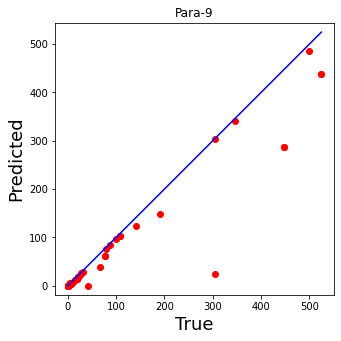

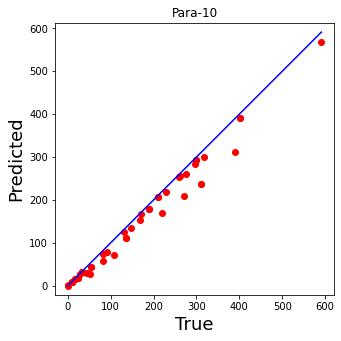

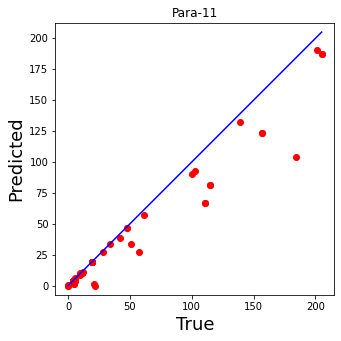

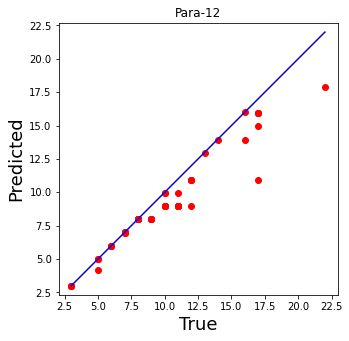

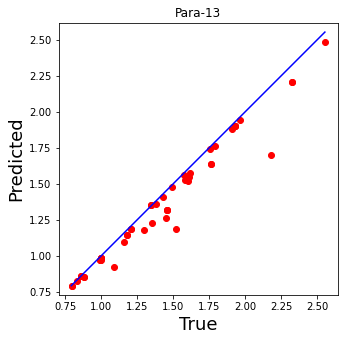

In [57]:
generator = []
for i in range(50):# pick 50 random rows to make plot
  generator.append(random.randint(0,90))
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
for i in range(5):
  plt.figure(figsize=(5, 5))
  predicted_value = df_prediction.iloc[generator, i]
  true_value = test_data.iloc[generator, i + 10]
  plt.scatter(true_value, predicted_value, c='red')
  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.axis('equal')
  plt.show()